In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

In [2]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [3]:
def score_dataset(X, y, model=XGBRegressor()):
    # Label encoding for categoricals
    for colname in X.select_dtypes(['category', 'object']):
        X[colname], _ = X[colname].factorize()
    # Metric for Housing competition is RMSLE(Root Mean Squared Log Error)
    score = cross_val_score(
        model, X, y, cv=5, scoring='neg_mean_squared_log_error')
    score = -1*score.mean()
    score = np.sqrt(score)
    return score

In [4]:
df = pd.read_csv('C:../../Dataset/FECourseData/ames.csv')

In [ ]:
df.info()

In [5]:
X = df.copy()
y = X.pop('SalePrice')

In [6]:
features = ['LotArea', 'TotalBsmtSF', 'FirstFlrSF', 'SecondFlrSF','GrLivArea']

In [ ]:
features

In [8]:
X_scaled = X.loc[:, features]
X_scaled

,LotArea,TotalBsmtSF,FirstFlrSF,SecondFlrSF,GrLivArea
0,31770.0,1080.0,1656.0,0.0,1656.0
1,11622.0,882.0,896.0,0.0,896.0
2,14267.0,1329.0,1329.0,0.0,1329.0
3,11160.0,2110.0,2110.0,0.0,2110.0
4,13830.0,928.0,928.0,701.0,1629.0
...,...,...,...,...,...
2925,7937.0,1003.0,1003.0,0.0,1003.0
2926,8885.0,864.0,902.0,0.0,902.0
2927,10441.0,912.0,970.0,0.0,970.0
2928,10010.0,1389.0,1389.0,0.0,1389.0


Text(0, 0.5, 'tt')

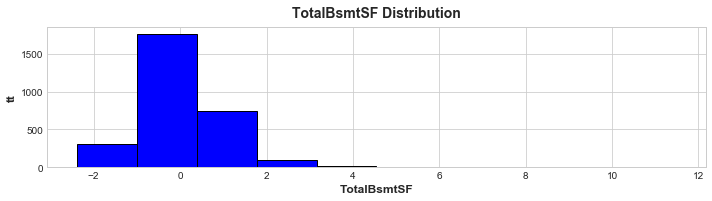

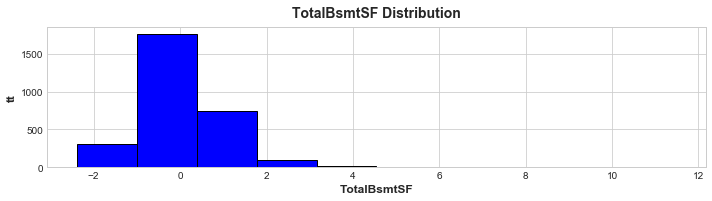

In [17]:
plt.figure(figsize=(10, 5))

# Histogram for Age
plt.subplot(2, 1, 1)
plt.hist(X_scaled['TotalBsmtSF'], bins=10, color='blue', edgecolor='black')
plt.title('TotalBsmtSF Distribution')
plt.xlabel('TotalBsmtSF')
plt.ylabel('tt')

X_scaled = (X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0)

plt.figure(figsize=(10, 5))

# Histogram for Age
plt.subplot(2, 1, 2)
plt.hist(X_scaled['TotalBsmtSF'], bins=10, color='blue', edgecolor='black')
plt.title('TotalBsmtSF Distribution')
plt.xlabel('TotalBsmtSF')
plt.ylabel('tt')

In [12]:
X_scaled = (X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0)

Text(0, 0.5, 'tt')

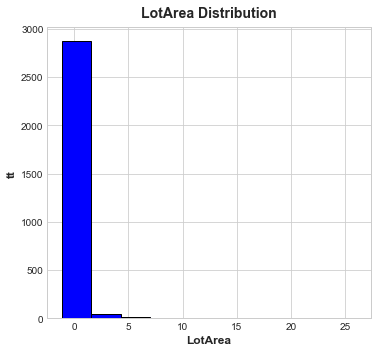

In [14]:
plt.figure(figsize=(10, 5))

# Histogram for Age
plt.subplot(1, 2, 2)
plt.hist(X_scaled['LotArea'], bins=10, color='blue', edgecolor='black')
plt.title('LotArea Distribution')
plt.xlabel('LotArea')
plt.ylabel('tt')

In [24]:
kmeans = KMeans(n_clusters=10, n_init=10, random_state=0)
X['Cluster'] = kmeans.fit_predict(X_scaled)

In [25]:
Xy = X.copy()

In [27]:
Xy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 79 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        2930 non-null   object 
 1   MSZoning          2930 non-null   object 
 2   LotFrontage       2930 non-null   float64
 3   LotArea           2930 non-null   float64
 4   Street            2930 non-null   object 
 5   Alley             2930 non-null   object 
 6   LotShape          2930 non-null   object 
 7   LandContour       2930 non-null   object 
 8   Utilities         2930 non-null   object 
 9   LotConfig         2930 non-null   object 
 10  LandSlope         2930 non-null   object 
 11  Neighborhood      2930 non-null   object 
 12  Condition1        2930 non-null   object 
 13  Condition2        2930 non-null   object 
 14  BldgType          2930 non-null   object 
 15  HouseStyle        2930 non-null   object 
 16  OverallQual       2930 non-null   object 


In [28]:
features

['LotArea', 'TotalBsmtSF', 'FirstFlrSF', 'SecondFlrSF', 'GrLivArea']

In [30]:

Xy['Cluster'] = Xy.Cluster.astype('category')
Xy['SalePrice'] = y
tt = Xy.melt(value_vars=features, id_vars=['SalePrice', 'Cluster'])

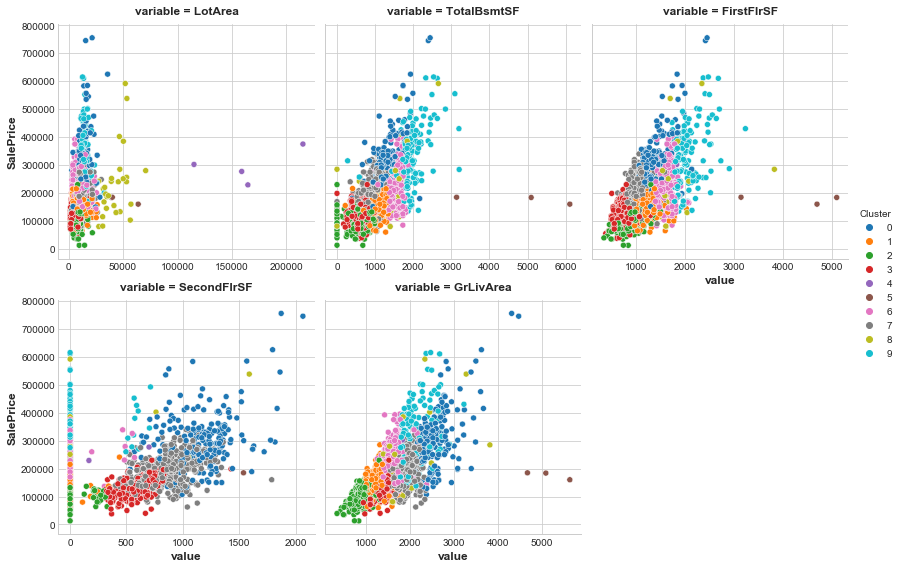

In [31]:
sns.relplot(
    x="value", y="SalePrice", hue="Cluster", col="variable",
    height=4, aspect=1, facet_kws={'sharex': False}, col_wrap=3,
    data=Xy.melt(
        value_vars=features, id_vars=["SalePrice", "Cluster"],
    ),
);

In [32]:
score_dataset(X, y)

C:\Anaconda3\envs\tf_cpu\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Anaconda3\envs\tf_cpu\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Anaconda3\envs\tf_cpu\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Anaconda3\envs\tf_cpu\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Anaconda3\envs\tf_cpu\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

0.14163599866634372

In [33]:
kmeans = KMeans(n_clusters=10, n_init=10, random_state=0)
X_cd = kmeans.fit_transform(X_scaled)

In [34]:
X_cd = pd.DataFrame(X_cd, columns=[f"Centroid_{i}" for i in range(X_cd.shape[1])])
X = X.join(X_cd)

In [35]:
score_dataset(X, y)

C:\Anaconda3\envs\tf_cpu\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Anaconda3\envs\tf_cpu\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Anaconda3\envs\tf_cpu\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Anaconda3\envs\tf_cpu\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Anaconda3\envs\tf_cpu\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

0.1391728155887944